
# Project: Investigate a TMDB movies Dataset over time

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">EDA(Exploratory Data Analysis)</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: The report provides a brief analysis to the "tmdb_movies" data set. At the end of this analysis, we will be able to have an understanding on the relations between different varaibles such as budget and revenue over time.
 Data set was downloaded then uploaded to the active work space on Udacity for analysis. After deciding on which data set to be used I checked the data on Excel and padas.


  ***By the end of the analysis, we will have a better understanding on the data analyzed. At the same time we will have more clarity on the relations between variables such as popularity and budget & revenue.***


## Questions:

**1- What is the relation between budget and revenue?**

**2- What is the relation between revenue and popularity?**

**3- What is the relation between release_date and dpopularity?**

**4- what is my evaluation to the dataset under consideration? Clarify more on the next steps if any.**

<a id='wrangling'></a>
## Data Wrangling

> Data set was loaded in, checked for cleanliness, and then trimmed and cleaned for analysis. All the steps are documented and justified carefully.

### Gathering and Assessing 
> Data set was downloaded from google link provided by Udacity and then uploaded to Udacity workspace. I faced continous saving errors on Udacity workspace. I redid some parts of the project 10 times and downloaded a copy for editing and submission as a backup.

In [1]:
# Import the packages that will be useful to analysis the TMDB movies data set 
import pandas as pd
import matplotlib as mp
import numpy as np
%matplotlib inline

# First step is to explorethe the csv file and display the first 7 rows

df=pd.read_csv("tmdb-movies.csv")

df.head(7)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08


***Upon displaying the column names, I noticed the final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars along with the budget and revenue columns. I was able to glance a sample from the structure of information as well. Next step will be to check the number of columns and rows***

In [2]:
# check the number of columns and rows 
df.shape

(10866, 21)

***So now we know that we are dealing with 21 column and 10866 rows. Next step would be to check the columns with null values and data types***

In [3]:
# Check the data types and have an initial idea on the missings
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

***I noticed 9 columns with null values.They are imdb_id, Cast, homepage, director, tagline, keywords, overview, genres, and production_companies. I decided to check the data set description before deciding the reasonable cleaning steps***

In [4]:
# Check the data description 
df. describe ()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


***Upon checking I noticed the difference between budget&budget_adj from one hand and revenue and revenue_adj on the other hand. Budget_adj: budget is approx 1.2, while revenue_adj to revenue is approx 1.2 as well which confirms the notes provided*** 

> **Findings**: Upon checking the data, The following observations were noticed:

     1- The data set has an "imdb_id" as seen in column number "1" and auto serial number"0". 
     The "id" can be used as an index and the auto serial number can be removed.

     2- Based on the number of raws in the data set, There are nine columns with null values. This needs to be analyzed 
     for the necessary corrective actions that will assure the most accuracy.

     3- Some movies are have zero budget , revenue and in some cases with zero runtime as well. Data samples from theses 
     cases needed to be checked for the necessary corrective actions
> **Next Steps: Conduct cleaning**

### Cleaning the TDMB data set

####  1- The data set has an "id" as seen in column number "1" and auto serial number"0".
      Since the "imdb_id" is unique, The 'imdb_id' can be used as an index and the auto serial number can be removed 
      for conciseness.


In [5]:
# Set "imdb_id" an an index
df.set_index('imdb_id', inplace=True)

In [6]:
# Display columns heads to comfirm the situation 
df.head(0)

,id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
imdb_id,,,,,,,,,,,,,,,,,,,,


In [7]:
# Double check the data set after removing the first column
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10866 entries, tt0369610 to tt0060666
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   homepage              2936 non-null   object 
 7   director              10822 non-null  object 
 8   tagline               8042 non-null   object 
 9   keywords              9373 non-null   object 
 10  overview              10862 non-null  object 
 11  runtime               10866 non-null  int64  
 12  genres                10843 non-null  object 
 13  production_companies  9836 non-null   object 
 14  release_date          10866 non-null  object 
 15  vote_count  

#### 2- Based on the number of raws in the data set, There are nine columns with null values. 
     These needs to be analyzed for the necessary corrective actions

In [8]:
#Check if there are null values in the data set
df.isnull().sum().any()

True

In [9]:
#Check the sum of null values in the data set
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

***Based on the initial analysis conducted and since most of the non values are categorical, leaving any of these non values will affect the accurancy of the population results. Accordingly I decided to drop all the null values for good and analyze the resulted sample with non null values only.This might not be applicable on other data sets. The main goal for me in this analysis was to assess accurate complete data.***

In [10]:
# to check the number of duplicates
sum(df.duplicated())

1

In [11]:
# Remove the duplicated row 
df.drop_duplicates(inplace=True)

In [12]:
# Confirm that the duplicated row was droped 
sum(df.duplicated())

0

In [13]:
# Drop rows with any null values
df.dropna(inplace=True)

In [14]:
#Confirm that the null values in the data set were removed 
df.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [15]:
# check the data set info after removing duplicates
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1992 entries, tt0369610 to tt0077696
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1992 non-null   int64  
 1   popularity            1992 non-null   float64
 2   budget                1992 non-null   int64  
 3   revenue               1992 non-null   int64  
 4   original_title        1992 non-null   object 
 5   cast                  1992 non-null   object 
 6   homepage              1992 non-null   object 
 7   director              1992 non-null   object 
 8   tagline               1992 non-null   object 
 9   keywords              1992 non-null   object 
 10  overview              1992 non-null   object 
 11  runtime               1992 non-null   int64  
 12  genres                1992 non-null   object 
 13  production_companies  1992 non-null   object 
 14  release_date          1992 non-null   object 
 15  vote_count   

***We will work on approx 20% (a sample) of the original data set( population). Since most of the data are categorical as explained earlier, the sample accuracy will higher than analyzing the total population.***  

In [16]:
# Check the data set description after removing nulls

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1992.000000,1992.000000,1.992000e+03,1.992000e+03,1992.000000,1992.000000,1992.000000,1992.000000,1.992000e+03,1.992000e+03
mean,71652.152108,1.316763,3.454924e+07,1.152153e+08,106.040161,643.616968,6.178614,2007.796687,3.627376e+07,1.302391e+08
std,92355.883915,1.873563,5.061878e+07,2.202887e+08,29.234592,1092.355998,0.881955,7.549224,5.129783e+07,2.564338e+08
min,11.000000,0.000620,0.000000e+00,0.000000e+00,0.000000,10.000000,2.100000,1961.000000,0.000000e+00,0.000000e+00
25%,9699.000000,0.384079,0.000000e+00,0.000000e+00,92.000000,51.000000,5.600000,2006.000000,0.000000e+00,0.000000e+00
50%,35112.500000,0.774223,1.500000e+07,2.578782e+07,102.000000,210.000000,6.200000,2010.000000,1.524601e+07,2.806370e+07
75%,83573.000000,1.538639,4.800000e+07,1.278787e+08,116.000000,688.250000,6.800000,2012.000000,5.064450e+07,1.393645e+08
max,414419.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.300000,2015.000000,4.250000e+08,2.827124e+09


***From sample analysis we noticed the following:***
* The budget mean is significantely higher than the population which can be an indicator on removing some of the budget cells with zero values. 
* The revenue mean in sample is lower than the population. This can be due to the removal of rows with null values.
* The Spread of budget and revenue is more reflective in the sample.
* The relation budget&budget_adj and revenue&revenue_adj is almost the same.
* We still have some Zero values spread over most of the quantitative columns. This will be checked in the next step.
* The release year range is almost the same, yet the spread is a bit different.
 
 ***Based on the above, we can conclude that the sample under investigation is a well representative to the total population. We are ready to proceed with the sample analysis***


#### 3- Checking if we still have movies with zero budget, zero revenue and runtimes

In [17]:
# Sorting the budget values to glance the zero budget items 
df.sort_values(by=['budget'])

,id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
imdb_id,,,,,,,,,,,,,,,,,,,,
tt0077696,16214,0.044675,0,78000000,Hooper,Burt Reynolds|Robert Klein|Adam West|Jan-Micha...,http://en.wikipedia.org/wiki/Hooper_(film),Hal Needham,The greatest stuntman alive!,stuntman|hollywood,Burt Reynolds plays a legendary stunt man know...,107,Action|Comedy,Warner Bros.,7/28/78,13,6.0,1978,0.000000e+00,2.607307e+08
tt1422020,43920,0.478118,0,430041,Dog Pound,Adam Butcher|Shane Kippel|Mateo Morales|Taylor...,http://www.dogpound-lefilm.com/,Kim Chapiron,Fighting Back Is The Only Way Out,juvenile prison|sodomy|incest overtones,Three juvenile delinquents arrive at a correct...,91,Drama,Angoa-Agicoa|TÃ©lÃ©film Canada|Mars Films|Part...,4/24/10,53,7.7,2010,0.000000e+00,4.300410e+05
tt1494772,30061,0.400305,0,0,Justice League: Crisis on Two Earths,Mark Harmon|William Baldwin|James Woods|Nolan ...,http://warnervideo.com/justiceleaguecrisis/,Sam Liu|Lauren Montgomery,"When Justice meets its match, worlds collide.",saving the world|dc comics|superhero|based on ...,A heroic version of Lex Luthor from an alterna...,75,Action|Adventure|Animation,DC Comics|Warner Premiere,2/23/10,79,7.1,2010,0.000000e+00,0.000000e+00
tt1587707,39452,0.397548,0,4790751,Exit Through the Gift Shop,Banksy|Shepard Fairey|Thierry Guetta|Rhys Ifans,http://www.banksyfilm.com/,Banksy,The world's first Street Art disaster movie,graffiti|fraud|cousin|painting|street artist,Banksy is a graffiti artist with a global repu...,87,Documentary,Paranoid Pictures,1/24/10,200,7.7,2010,0.000000e+00,4.790751e+06
tt1391034,33107,0.385303,0,0,And Soon the Darkness,Odette Annable|Amber Heard|Karl Urban|Adriana ...,http://www.andsoonthedarkness.com,Marcos Efron,Alone. Stranded. No One to Trust.,remake|murder|kidnapping|argentina|torture,When two American girls on a bike trip in a re...,91,Horror|Thriller|Crime|Mystery,StudioCanal|Abandon Pictures|Sandbar Pictures|...,2/25/10,54,5.1,2010,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt0401729,49529,1.588457,260000000,284139100,John Carter,Taylor Kitsch|Lynn Collins|Mark Strong|Willem ...,http://disney.go.com/johncarter/,Andrew Stanton,Lost in Our World. Found in Another.,based on novel|mars|medaillon|cave|future,Civil War vet John Carter is transplanted to M...,132,Action|Adventure|Fantasy|Science Fiction,Walt Disney Pictures,3/7/12,1479,6.0,2012,2.469335e+08,2.698595e+08
tt2395427,99861,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,http://marvel.com/movies/movie/193/avengers_ag...,Joss Whedon,A New Age Has Come.,marvel comic|comic|sequel|superhero|vision,When Tony Stark tries to jumpstart a dormant p...,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,4/22/15,4304,7.4,2015,2.575999e+08,1.292632e+09
tt0449088,285,4.965391,300000000,961000000,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,http://disney.go.com/disneypictures/pirates/,Gore Verbinski,"At the end of the world, the adventure begins.",ocean|drug abuse|exotic island|east india trad...,"Captain Barbossa, long believed to be dead, ha...",169,Adventure|Fantasy|Action,Walt Disney Pictures|Jerry Bruckheimer Films|S...,5/19/07,2626,6.8,2007,3.155006e+08,1.010654e+09


In [18]:
# Sorting the revenue values to glance the zero revenue items 
df.sort_values(by=['revenue'])

,id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
imdb_id,,,,,,,,,,,,,,,,,,,,
tt1407049,44678,0.321863,0,0,Altitude,Jessica Lowndes|Julianna Guill|Ryan Donowho|La...,http://www.altitudemovie.com/,Kaare Andrews,Don't Look Down.,race against time|danger|against the odds|chas...,After a mysterious malfunction sends their sma...,90,Horror|Action|Thriller|Science Fiction,Darclight Films,10/10/10,36,4.8,2010,0.000000e+00,0.000000e+00
tt1673430,45162,0.444944,3500000,0,Superman/Batman: Apocalypse,Summer Glau|Ed Asner|Tim Daly|Andre Braugher|K...,http://warnervideo.com/supermanbatmanapocalypse//,Lauren Montgomery,The end is near.,dc comics|superhero|superhuman|super powers|wo...,Batman discovers a mysterious teen-aged girl w...,78,Animation|Action|Adventure,DC Comics|Warner Premiere,9/28/10,95,7.0,2010,3.500000e+06,0.000000e+00
tt1283887,45013,0.442823,5800000,0,Burning Palms,Zoe Saldana|Jamie Chung|Rosamund Pike|Lake Bel...,http://www.theburningpalms.com/,Christopher B. Landon,Five Tales That Will F#%! You Up For Life,career|independent film|taboo|subversive tale|...,A subversive tale that interlaces five stories...,112,Comedy|Drama|Family,Films In Motion,4/23/10,11,5.5,2010,5.800000e+06,0.000000e+00
tt1447793,46198,0.423512,1400000,0,My Girlfriend's Boyfriend,Alyssa Milano|Christopher Gorham|Michael Lande...,http://www.mygirlfriendsboyfriend.com/,Daryn Tufts,The story of a girl who meets her one true lov...,based on novel|commercial|brother sister relat...,When Ethan (Christopher Gorham) arrives at the...,84,Comedy|Romance,fiftyfilms,4/22/10,31,6.0,2010,1.400000e+06,0.000000e+00
tt1398428,47386,0.401176,500000,0,YellowBrickRoad,Michael Laurino|Anessa Ramsey|Alex Draper|Cass...,http://www.yellowbrickroadthemovie.com/index.html,Andy Mitton|Jesse Holland,They went looking for evil in the forest but t...,new hampshire|woods|color in title|new england,"In the Fall of 1940, the entire population of ...",99,Horror|Thriller,Points North Film,1/23/10,22,5.0,2010,5.000000e+05,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt0369610,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
tt0848228,24428,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,http://marvel.com/avengers_movie/,Joss Whedon,Some assembly required.,new york|shield|marvel comic|comic|superhero,When an unexpected enemy emerges and threatens...,143,Science Fiction|Action|Adventure,Marvel Studios,4/25/12,8903,7.3,2012,2.089437e+08,1.443191e+09
tt0120338,597,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,http://www.titanicmovie.com/menu.html,James Cameron,Nothing on Earth could come between them.,shipwreck|iceberg|ship|panic|titanic,"84 years later, a 101-year-old woman named Ros...",194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09


In [19]:
# Sorting the runtime values to glance the zero runtimeitems 
df.sort_values(by=['runtime'])

,id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
imdb_id,,,,,,,,,,,,,,,,,,,,
tt1791681,286372,0.037459,3250000,0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,http://www.imdb.com/title/tt1791681/,Michael G. Bartlett,No kids allowed,kidnapping|brutality|violence|teenager|discovery,A teenage boy discovers the perpetrators of se...,0,Thriller|Horror|Mystery,Tiberius Film,10/20/14,16,3.4,2014,2.993546e+06,0.000000e+00
tt5065822,361931,0.357654,0,0,Ronaldo,Cristiano Ronaldo,http://www.ronaldothefilm.com,Anthony Wonke,Astonishing. Intimate. Definitive.,biography|soccer player,Filmed over 14 months with unprecedented acces...,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11/9/15,80,6.5,2015,0.000000e+00,0.000000e+00
tt1425244,24480,0.369792,0,0,Partly Cloudy,Tony Fucile|Lori Richardson,http://www.pixar.com/short_films/Theatrical-Sh...,Peter Sohn,Charming and cute and clever,american football|baby|cloud|alligator|eel,"Everyone knows that the stork delivers babies,...",5,Adventure|Animation|Comedy|Family|Fantasy,Pixar Animation Studios,5/28/09,218,7.9,2009,0.000000e+00,0.000000e+00
tt1245104,13042,0.905428,0,0,Presto,Doug Sweetland,http://www.pixar.com/shorts/presto/index.html,Doug Sweetland,An Amazing Five Minutes Of Animated Fun,stage|banjo|magic|bunny|rabbi,Dignity. Poise. Mystery. We expect nothing les...,5,Animation|Family,Pixar Animation Studios,6/18/08,279,8.0,2008,0.000000e+00,0.000000e+00
tt2340678,130925,0.407520,0,0,Partysaurus Rex,Tom Hanks|Tim Allen|Wallace Shawn|Corey Burton...,http://www.pixar.com/short_films/toy-story-too...,Mark A. Walsh,An Electro Sudsy Good Time!,tyrannosaurus rex|bath tub|water|party|toys,When Rex finds himself left behind in the bath...,7,Animation|Comedy|Family|Fantasy,Walt Disney Pictures|Pixar Animation Studios,9/14/12,54,7.5,2012,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt0142032,876,0.381729,20000000,0,Frank Herbert's Dune,William Hurt|Alec Newman|Saskia Reeves|Ian McN...,http://www.scifi.com/dune_2k/,John Harrison,Discover the greatest treasure in the universe.,imperator|rebel|prophecy|telepathy|sandstorm,A three part mini-series based on Frank Herber...,292,Action|Adventure|Fantasy|Science Fiction,New Amsterdam Entertainment|Tandem Communications,12/3/00,67,6.5,2000,2.532584e+07,0.000000e+00
tt1492030,202241,0.044221,20000000,0,Mildred Pierce,Kate Winslet|Evan Rachel Wood|Guy Pearce|Mare ...,http://www.hbo.com/mildred-pierce/index.html,Todd Haynes,Having It All Would Cost Her Everything.,infidelity|business woman|from rags to riches,"A newly divorced, uniquely independent woman s...",336,Drama,Home Box Office (HBO)|Metro-Goldwyn-Mayer (MGM),3/27/11,21,6.6,2011,1.938796e+07,0.000000e+00
tt1533395,220903,0.102223,0,0,Life,David Attenborough|Oprah Winfrey,http://www.bbc.co.uk/programmes/b00lbpcy,Martha Holmes|Simon Blakeney|Stephen Lyle,From the Makers of Planet Earth,plants|animal species|biology|wildlife|ecology,David Attenborough's legendary BBC crew explai...,500,Documentary,British Broadcasting Corporation (BBC),12/14/09,24,7.0,2009,0.000000e+00,0.000000e+00


***As we can see:***

* we have movies with Zero budget like "Hooper" yet have a huge revenue of 78,000,000 and 107 runtimes.

* Another category of movies with Zero budget and Zero revenue yet with 112 runtimes such as "Larysa Kondracki".

* A third category with 5,800,000 budget, Zero revenue and 112 runtimes and the movie name is "Burning Palms".
* A forth category of movies with Zero budget, zero revenue and zero runtime like a movie named "Ronaldo".

***Those are all crucial interesting area of further research that are out of our analysis scope. I would highly recommend studying these individual cases for clarity on the situation and the reasons behind that.***


**Cleaning stage conclusion, Upon working on the three observation points:**

 * The auto serial was sucessfully removed.

 * The null values were sucessfully removed from the data set to have an accurate sample out of the poulation 

 * Movies with Zero budget,Zero revenue and/ or Zero runtime were checked. After cleaning the null values we still have 
   zero categories that were described above. Further research would be required to have a clear understanding.
> ***Next Steps: Conduct EDA***

<a id='eda'></a>
## EDA (Explotory Data Analysis)

Now we know that we have sample under investigation that is a well representative to the total population. Duplicates and null values were removed. We also know that we have the interesting Zero values noticed during the cleaning stage.

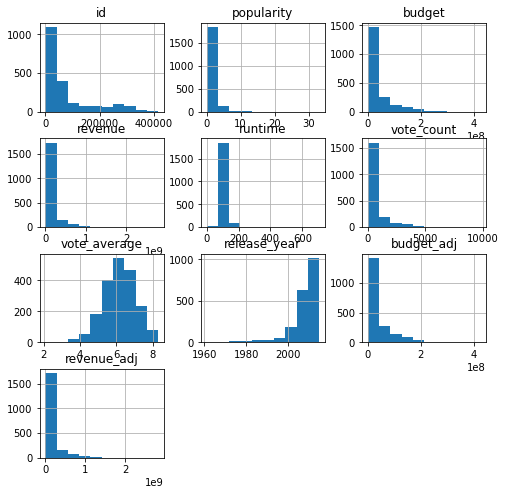

In [20]:
# Explore quantitatie data
df.hist(figsize=(8,8));
# Using Matplotlib we are able to see the skew direction. As we can see revenue, runtime, budget, vote_average, and budget_adj
#  are skewed to the right.
#This implies that mean is greater than median which goes in hand with the above conducted analysis we did using describe.
#release_year is skewed to the left, median is greater than mean, which makes sense and goes hand in hand with the above analysis.
#revenue_adj bell shape is an interesting area for further research

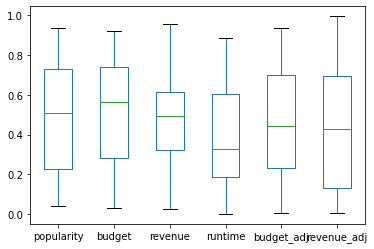

In [21]:
#Explore the data set using box plot to see outliers
df = pd.DataFrame(np.random.rand(20, 6), columns=["popularity", "budget", "revenue", "runtime", "budget_adj","revenue_adj"])

df.plot.box();

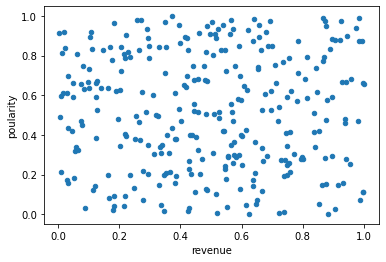

In [22]:
# Explore the relation between revenue and popularity 
df = pd.DataFrame(np.random.rand(300,2 ), columns=["revenue", "poularity"])

df.plot.scatter(x="revenue", y="poularity");
# The scatter will display relation between revenue and populatrity.
# The outcome is a random and weak relation without a negative or a positive direction. 


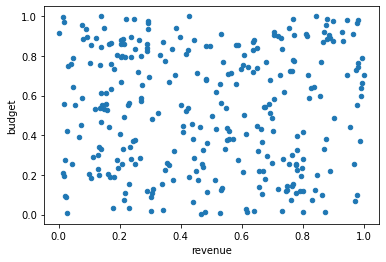

In [23]:
# Explore the relation between budget and revenue 
df = pd.DataFrame(np.random.rand(300,2 ), columns=["revenue", "budget"])
df.plot.scatter(x="revenue", y="budget");
# The scatter will display relation between revenue and budget.
# The outcome is a random and weak relation without a negative or a positive direction

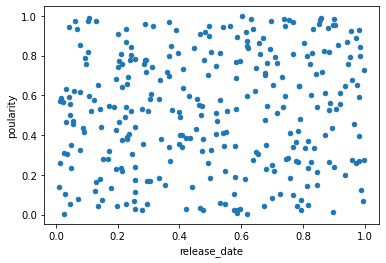

In [24]:
# Explore the relation between popularity and release_date 
df = pd.DataFrame(np.random.rand(300,2 ), columns=["release_date", "poularity"])
df.plot.scatter(x="release_date", y="poularity");
# The scatter will display relation between release_date and popularity.
# The outcome is a random and weak relation without a negative or a positive direction

**After exploring and augmenting the data data to maximize the potential of analyses, visualizations, and models. 
We can conclude that:**
 * Budget and budget_adj histograms takes the same skew direction which implies on the revenue and revenue_adj as well.
 * Box plot gave us a clear indication on the data and outliers
 * Using scatter plot, we were not able to find a direct, positive/negative correlateion between
   budget and revenue, release_date and popularity, revenue and popularity. 
 
 
 ***In most industries, when we look at the budget and revenue and be able to clearly understand the negative or positive relation between.In the movies industry or to be specific in this data set we are not able to do so.
 Based on the above conducted analysis, It seams reasonable to say that each movie genre has a relation to revenue over time.***
 
***Next Steps: Conclusion***

<a id='conclusions'></a>
## Conclusions

**This data set gave me a rich analysis experience exposure. While browsing the data, I got a lot of questions on mind that need answers. I really enjoyed the experience of diving in this data set.**

**We started the analysis by having 10866 raws including null values spread over 9 columns in our analysis.
We ended up having a representative sample of 1992 to work on.
It was decided to clear the null value to have a complete sample. Based on the aboe anaylsis after cleaning we can conclude that the sample represented the data set with higher accuracy than the original data set.**

**After cleaning, It was discovered that there were zero budget movies with revenue and runtime.
A second key point those movies with Zero revenue, Zero budget along with Zero runtime. A third key was, Zero budget, Zero revenue and runtime. A forth one was budget, Zero revenue and zero runtime. 
These cases needs further analysis. I would recommend individual analysis for further understanding.**

**Another interesting area for further research is the coorelation between budget and revenue. 
Unlike many industries, the relation between budget and revenue is scattered and with no positive or negative direction.**



### Limitations faced during the analysis

* The data provided by the dataset sufficient was not suffecient to get into details like zero budgets, revenues, and runtime. There are no footnotes or comments on those cases.
* The data size of the dataset is sufficient to give a good judgement about the questions especially after we took the sample.
* The major difficulties encountered in the dataset while performing the analysis are:
* The Zero values in budget, revenue and runtime
* The nullvalues that were in categorical data such as the homepage that had 7930 null value
* Deciding to take a sample to assure acurracy was really challenging. Dropping full lines and assuring the data spread was not easy as well. 
* Dataset was not sufficient to decide on existing correlations between variables and this can be seen clearly in the scatter plot analysis.

In [25]:
# Save to new file 
df.to_csv('editedtmdb-movies.csv', index=False)

In [26]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1